**Grounding dino implementation on rice pests**


*   Training with one image



For the training part we are using the grounding dino implementation from mm detection tool box which enables us to train the grounding dino on custom dataset, the goal is to test the grounding dino's accuracy while training it on incrementing order of images.

Let's start with the setup of mmdetection toolbox before training the grounding dino on custom pest dataset.

For the mmdetection toolbox we need to downgrade the torch version on our notebook to install it properly.

In [ ]:
 !pip install torch==2.0.0 torchvision==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Lets create a folder in the drive and mount it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/groundingdinov8

/content/drive/MyDrive/groundingdinov8


Now clone the mmdetection github repository

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/drive/MyDrive/groundingdinov8/mmdetection
Obtaining file:///content/drive/MyDrive/groundingdinov8/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


Now install the dependencies

In [ ]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.1/443.1 kB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.9 MB/s eta 0:

Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 22.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.3.0 requires mmcv<2.2.0,>=2.0.0rc4, which is not installed.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 MB 9.3 MB/s eta 0:00:00


Test whether the version installed properly

In [ ]:
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

3.3.0


In [ ]:
%cd $MMDETROOT

# source installation
!pip install -r requirements/multimodal.txt

# or mim installation
!mim install mmdet[multimodal]

[Errno 2] No such file or directory: '$MMDETROOT'
/content/drive/MyDrive/groundingdinov8/mmdetection
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html


In [ ]:
from transformers import BertConfig, BertModel
from transformers import AutoTokenizer

config = BertConfig.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", add_pooling_layer=False, config=config)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

config.save_pretrained("/content/drive/MyDrive/groundingdinov8/bert-base-uncased")
model.save_pretrained("/content/drive/MyDrive/groundingdinov8/bert-base-uncased")
tokenizer.save_pretrained("/content/drive/MyDrive/groundingdinov8/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

('/content/drive/MyDrive/groundingdinov8/bert-base-uncased/tokenizer_config.json',
 '/content/drive/MyDrive/groundingdinov8/bert-base-uncased/special_tokens_map.json',
 '/content/drive/MyDrive/groundingdinov8/bert-base-uncased/vocab.txt',
 '/content/drive/MyDrive/groundingdinov8/bert-base-uncased/added_tokens.json',
 '/content/drive/MyDrive/groundingdinov8/bert-base-uncased/tokenizer.json')

Now Download the pretrained grounding dino model

In [ ]:
!wget https://download.openmmlab.com/mmdetection/v3.0/grounding_dino/groundingdino_swint_ogc_mmdet-822d7e9d.pth

--2024-08-21 17:19:07--  https://download.openmmlab.com/mmdetection/v3.0/grounding_dino/groundingdino_swint_ogc_mmdet-822d7e9d.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 192.169.122.216, 192.169.122.217, 192.169.122.210, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|192.169.122.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 691901857 (660M) [application/octet-stream]
Saving to: ‘groundingdino_swint_ogc_mmdet-822d7e9d.pth.1’

groundingdino_swint 100%[===================>] 659.85M  15.9MB/s    in 43s     

2024-08-21 17:19:52 (15.3 MB/s) - ‘groundingdino_swint_ogc_mmdet-822d7e9d.pth.1’ saved [691901857/691901857]



In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Lets test the downloaded model on normal labels

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/demo/demo.jpg \
    /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_pretrain_obj365_goldg_cap4m.py \
    --weights /content/drive/MyDrive/groundingdinov8/mmdetection/groundingdino_swint_ogc_mmdet-822d7e9d.pth\
    --texts 'bench . car .'


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loads checkpoint by local backend from path: /content/drive/MyDrive/groundingdinov8/mmdetection/groundingdino_swint_ogc_mmdet-822d7e9d.pth
Traceback (most recent call last):
  File "/content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py", line 192, in <module>
    main()
  File "/content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py", line 179, in main
    inferencer = DetInferencer(**init_args)
  File "/content/drive/MyDrive/groundingdinov8/mmdetection/mmdet/apis/det_inferencer.py", line 99, in __init__
    super().__init__(
  File "/usr/local/lib/python3.10/dist-packages/mmengine/infer/infer.py", line 180, in __init__
    self.model = self._init_model(cfg, weights, device)  # type: ignore
  File "/usr/local/lib

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/train.py /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_pest.py

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 20:40:07 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 93372861
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbea

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/train.py /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/groundingdino_pestfinetune5.py

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 20:53:24 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 938120730
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbe

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/train.py /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/groundingdino_pestfinetune9.py

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 21:01:07 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1269237412
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbb

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/train.py /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/groundingdino_pestdinetunefull.py

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 21:16:27 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 239720147
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbe

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py /content/drive/MyDrive/groundingdinov8/data/testing/30.jpg /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/grounding_dino_swin-t_finetune_8xb2_20e_pest/grounding_dino_swin-t_finetune_8xb2_20e_pest.py --weights /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/grounding_dino_swin-t_finetune_8xb2_20e_pest/best_coco_bbox_mAP_epoch_1.pth --texts pest.

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loads checkpoint by local backend from path: /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/grounding_dino_swin-t_finetune_8xb2_20e_pest/best_coco_bbox_mAP_epoch_1.pth
08/21 21:42:07 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument

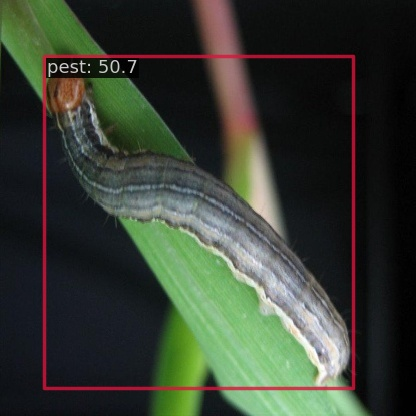

In [ ]:
from IPython.display import Image, display

# Replace 'output_image.jpg' with the actual file name
display(Image(filename='/content/drive/MyDrive/groundingdinov8/mmdetection/outputs/vis/30.jpg'))

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py /content/drive/MyDrive/groundingdinov8/data/testing/30.jpg /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune5/groundingdino_pestfinetune5.py --weights /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune5/best_coco_bbox_mAP_epoch_1.pth --texts pest.

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loads checkpoint by local backend from path: /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune5/best_coco_bbox_mAP_epoch_1.pth
08/21 21:47:22 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn

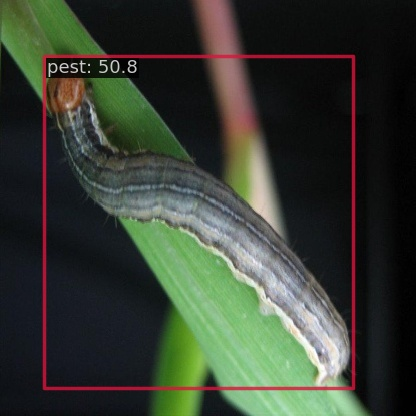

In [ ]:
from IPython.display import Image, display

# Replace 'output_image.jpg' with the actual file name
display(Image(filename='/content/drive/MyDrive/groundingdinov8/mmdetection/outputs/vis/30.jpg'))

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py /content/drive/MyDrive/groundingdinov8/data/testing/30.jpg /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune9/groundingdino_pestfinetune9.py --weights /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune9/best_coco_bbox_mAP_epoch_3.pth --texts pest.

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loads checkpoint by local backend from path: /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune9/best_coco_bbox_mAP_epoch_3.pth
08/21 21:50:31 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn

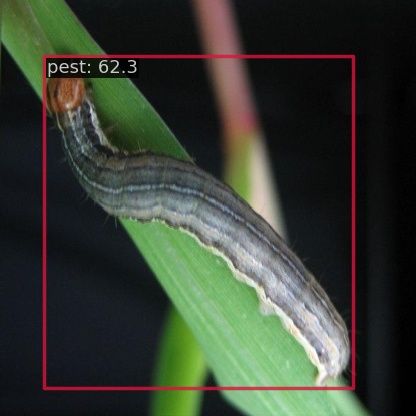

In [ ]:
from IPython.display import Image, display

# Replace 'output_image.jpg' with the actual file name
display(Image(filename='/content/drive/MyDrive/groundingdinov8/mmdetection/outputs/vis/30.jpg'))

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/demo/image_demo.py /content/drive/MyDrive/groundingdinov8/data/testing/30.jpg /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestdinetunefull/groundingdino_pestdinetunefull.py --weights /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestdinetunefull/epoch_3.pth --texts pest.

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loads checkpoint by local backend from path: /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestdinetunefull/epoch_3.pth
08/21 21:56:38 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add

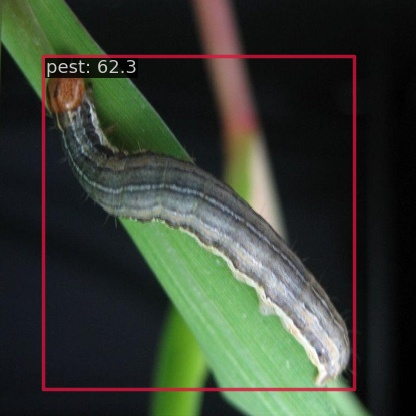

In [ ]:
from IPython.display import Image, display

# Replace 'output_image.jpg' with the actual file name
display(Image(filename='/content/drive/MyDrive/groundingdinov8/mmdetection/outputs/vis/30.jpg'))

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/test.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_pest.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/grounding_dino_swin-t_finetune_8xb2_20e_pest/best_coco_bbox_mAP_epoch_1.pth \


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 22:05:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 52851119
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbea

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/test.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_pest.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune5/best_coco_bbox_mAP_epoch_1.pth

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 22:09:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1649061638
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbb

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/test.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_pest.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestfinetune9/best_coco_bbox_mAP_epoch_3.pth

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 22:11:11 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1726951930
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbb

In [ ]:
!python /content/drive/MyDrive/groundingdinov8/mmdetection/tools/test.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_pest.py \
    /content/drive/MyDrive/groundingdinov8/mmdetection/work_dirs/groundingdino_pestdinetunefull/best_coco_bbox_mAP_epoch_3.pth

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
08/21 22:12:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1155890795
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbb

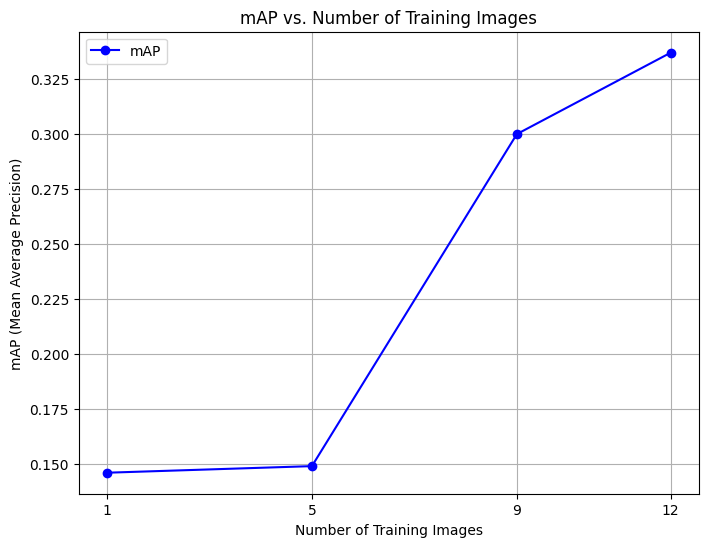

In [ ]:
import matplotlib.pyplot as plt

# Number of images used for training
num_images = [1, 5, 9, 12]

# Corresponding mAP values
map_values = [0.146, 0.149, 0.300, 0.337]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(num_images, map_values, marker='o', linestyle='-', color='b', label='mAP')

# Adding labels and title
plt.xlabel('Number of Training Images')
plt.ylabel('mAP (Mean Average Precision)')
plt.title('mAP vs. Number of Training Images')
plt.grid(True)
plt.xticks(num_images)  # Ensure the x-axis shows the exact number of images used
plt.legend()

# Show the plot
plt.show()
